In [1]:
import sys

import matplotlib.pyplot as plt
import json
import os.path
import itertools

import dysts
from dysts.flows import *
from dysts.base import *
from dysts.utils import *
from dysts.analysis import *

%load_ext autoreload
%autoreload 2

## Make datasets without noise

In [ ]:
DATA_BASEPATH = "../dysts/data/"
np.random.seed(0)

num_periods = {
    "train": 12,
    "test": 12
}
for (ts_type, subset, pts_per_period) in itertools.product(
                                                      ["univariate", "multivariate"], 
                                                      ["train", "test"], 
                                                      [15, 100]
                                                    ):
    output_path = os.path.join(DATA_BASEPATH, f"{subset}_{ts_type}__pts_per_period_{pts_per_period}__periods_{num_periods[subset]}.json")
    dataset = dict()

    for i, name in enumerate(get_attractor_list()):
        print(name)
        dataset[name] = dict()
        model = getattr(dysts.flows, name)()
        # make initial conditions for train, val, test
        [train_ic, val_ic, test_ic] = sample_initial_conditions(model, 3)

        if subset == "train":
            model.ic = train_ic
        elif subset == "val":
            model.ic = val_ic
        elif subset == "test":
            model.ic = test_ic
        else:
            pass
        tpts, sol = model.make_trajectory(num_periods[subset] * pts_per_period, pts_per_period=pts_per_period, 
                                       resample=True, return_times=True)


        if ts_type == "univariate":
            values = sol[:, 0].tolist()
        elif ts_type == "multivariate":
            values = sol.tolist()
        else:
            warnings.warn("Specified time series type not \"univariate\" or \"multivariate\", falling back to univariate")
            values = sol[:, 0]

        dataset[name]["time"] = tpts.tolist()
        dataset[name]["dt"] = np.median(np.diff(tpts))

        dataset[name]["values"] = values
        with open(output_path, 'w') as f:
            json.dump(dataset, f, indent=4)

# Make dataset with noise

In [250]:
# sol = model.make_trajectory(1000, pts_per_period=pts_per_period, resample=True)

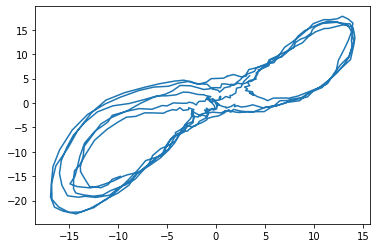

In [78]:

sol = Lorenz().make_trajectory(500, noise=0.2, resample=True)
plt.plot(sol[:, 0], sol[:, 1])

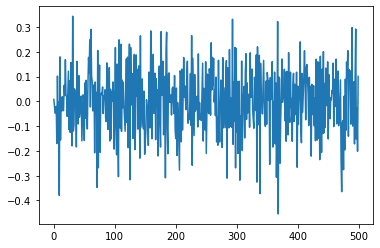

In [273]:
plt.plot(sol[:, 0]- sol_detrend)

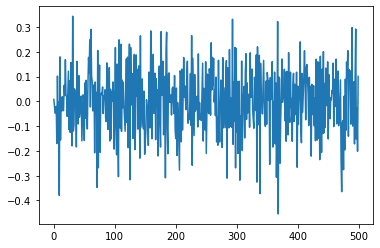

In [277]:
plt.plot(sol[:, 0]- sol_detrend)

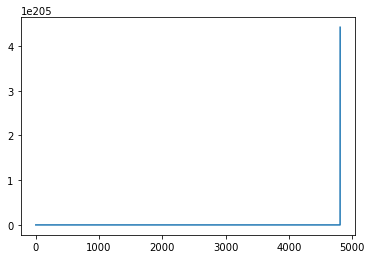

In [311]:
plt.plot(noise_traj[:, 1])

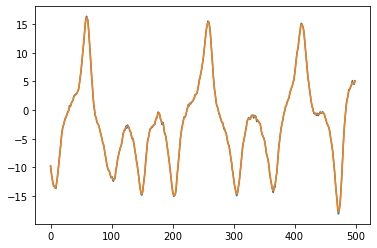

In [276]:
import scipy.signal
# sol_detrend = scipy.signal.detrend(sol[:, 0])

plt.plot(sol[:, 0])
plt.plot(sol_detrend)

In [17]:
noise_traj

array([[ 1.89276643, -2.99581985, -1.2981937 ],
       [ 2.14669312, -2.39724919, -1.3853376 ],
       [ 2.37954705, -1.81549902, -1.44325431],
       ...,
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan]])

In [20]:
import scipy.signal
DATA_BASEPATH = "../dysts/data/"
np.random.seed(0)

# ts_type = "multivariate"
# subset = "train"
# pts_per_period = 15 # granularity 15 or 100
# pts_per_period = 100 # granularity 15 or 100


# num_periods = {
#     "large": 100,
#     "train": 10,
#     "val": 2,
#     "test": 2
# }

## iterate over uni/multi, train partition, and granularity
# for (ts_type, subset, pts_per_period) in itertools.product(
#                                                       ["univariate", "multivariate"], 
#                                                       ["train", "val", "test"], 
#                                                       [15, 100]
#                                                     ):

# for (ts_type, subset, pts_per_period) in [("univariate", "large", 100)]:

NOISE_FLAG = True
num_periods = {
    "train": 12,
    "test": 12
}
for (ts_type, subset, pts_per_period) in itertools.product(
                                                      ["multivariate", "univariate"], 
                                                      ["train", "test"], 
                                                      [100, 15]
                                                    ):
    
    if NOISE_FLAG:
        output_path = os.path.join(DATA_BASEPATH, f"{subset}_{ts_type}__pts_per_period_{pts_per_period}__periods_{num_periods[subset]}_noise.json")
    else:
        output_path = os.path.join(DATA_BASEPATH, f"{subset}_{ts_type}__pts_per_period_{pts_per_period}__periods_{num_periods[subset]}.json")
    
    dataset = dict()

    for i, name in enumerate(get_attractor_list()):
        print(name)
        dataset[name] = dict()
        model = getattr(dysts.flows, name)()
        # make initial conditions for train, val, test
        [train_ic, val_ic, test_ic] = sample_initial_conditions(model, 3)

        if subset == "train":
            model.ic = train_ic
        elif subset == "val":
            model.ic = val_ic
        elif subset == "test":
            model.ic = test_ic
        else:
            pass
        
        
        
#         sol = model.make_trajectory(500, pts_per_period=pts_per_period, resample=True)
        #noise_scale = 0.02 * np.median(np.abs(sol))
        #noise_scale = 0.01 * np.max(np.median(np.abs(sol), axis=1))
        #noise_scale = 0.01 * np.min(np.median(np.abs(sol), axis=1))
#         noise_scale = 0.02 * np.max(np.std(sol, axis=0))
#         noise_scale = 0.01
        #noise_scale = 0.01 * np.min(np.std(sol, axis=0))
        #noise_scale = 0.02 * np.median(np.std(sol, axis=0)) / (10 * np.sqrt(model.dt))
#         noise_scale =  0.01 * np.max(np.std(sol, axis=0)) / (10 * np.sqrt(model.dt))
#         print(model.dt, model.period)
        
        
#         ref_traj = model.make_trajectory(5000, pts_per_period=pts_per_period, resample=False)
#         noise_traj = model.make_trajectory(5000, noise=0.5, pts_per_period=pts_per_period, resample=False)
#         noise_scale = np.max(np.sqrt(np.abs(np.var(noise_traj, axis=0) - np.var(ref_traj, axis=0))))
#         noise_scale = 0.1 * 1.5 / noise_scale
        
#         ref_traj = model.make_trajectory(2, pts_per_period=pts_per_period, resample=True)
#         noise_traj = model.make_trajectory(2, noise=0.5, pts_per_period=pts_per_period, resample=True)
#         noise_scale = np.median(np.abs((ref_traj - noise_traj)[-1]))
#         noise_scale = 0.35 * 0.025 / noise_scale
# #         noise_scale = 0.2 * 2.219312524586793 *  noise_scale
        
        noise_traj = model.make_trajectory(5000, noise=0.05, pts_per_period=pts_per_period, resample=False)
        all_noise_vals = list()
        for row in noise_traj.T:
            row_detrend = scipy.signal.savgol_filter(row, 7, 1)
            all_noise_vals.append(np.std(row - row_detrend))
        noise_scale = np.min(all_noise_vals)
        noise_scale = 0.04 * 0.025 / noise_scale
#         noise_scale = 0.1
        
#         model.dt *= 0.5
        
    
        solver_settings = {
            "pts_per_period" :  pts_per_period,
            "resample" : True,
            "method" : "Radau",
            "return_times" : True
        }
        
        try:
            tpts, sol = model.make_trajectory(num_periods[subset] * pts_per_period, 
                                              noise=noise_scale, 
                                              **solver_settings
                                             )
        except:
            print("Error encountered, reducing timestep")
            model.dt *= 0.1
            tpts, sol = model.make_trajectory(num_periods[subset] * pts_per_period, 
                                              noise=noise_scale, 
                                             **solver_settings
                                             )
            
        
#         if np.any(np.isnan(sol)):
#             # Deal with bad integration
#             while np.any(np.isnan(sol)):
#                 np.random.random()
#                 noise_scale *= .8
#                 tpts, sol = model.make_trajectory(num_periods[subset] * pts_per_period, 
#                                                   noise=noise_scale, 
#                                                  **solver_settings
#                                                  )
                

        if ts_type == "univariate":
            values = sol[:, 0].tolist()
        elif ts_type == "multivariate":
            values = sol.tolist()
        else:
            warnings.warn("Specified time series type not \"univariate\" or \"multivariate\", falling back to univariate")
            values = sol[:, 0]

        dataset[name]["time"] = tpts.tolist()
        dataset[name]["dt"] = np.median(np.diff(tpts))

        dataset[name]["values"] = values
        with open(output_path, 'w') as f:
            json.dump(dataset, f, indent=4)  
            
    break
    
#     dataset[name]["values"] = 7
    
#     break
#     with open(output_path_multi, 'w') as f:
#         json.dump(dataset, f, indent=4)    

Aizawa
AnishchenkoAstakhov


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/flows.py:1241: RuntimeWarning: overflow encountered in double_scalars
  xdot = mu * x + y - x * z
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/flows.py:1243: RuntimeWarning: overflow encountered in double_scalars
  zdot = -eta * z + eta * np.heaviside(x, 0) * x ** 2
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/flows.py:1243: RuntimeWarning: invalid value encountered in double_scalars
  zdot = -eta * z + eta * np.heaviside(x, 0) * x ** 2


Arneodo
ArnoldBeltramiChildress


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:208: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


ArnoldWeb
BeerRNN
BelousovZhabotinsky


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:185: UserWarning: Expect slowdown due to excessive integration required; scale factor 1587.2891671013736
  warnings.warn(


BickleyJet
Blasius
BlinkingRotlet
BlinkingVortex
Bouali
Bouali2


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/sdeint/integrate.py:480: RuntimeWarning: invalid value encountered in add
  H20 = Yn + fnh # shape (d,)


BurkeShaw
CaTwoPlus
CaTwoPlusQuasiperiodic
CellCycle
CellularNeuralNetwork
Chen
ChenLee
Chua
CircadianRhythm
CoevolvingPredatorPrey
Colpitts
Coullet
Dadras


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/sdeint/integrate.py:486: RuntimeWarning: invalid value encountered in add
  Yn1 = Yn + 0.5*(fnh + fn1h) + np.dot(Gn, Ik)


DequanLi
DoubleGyre
DoublePendulum
Duffing
ExcitableCell


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/flows.py:1102: RuntimeWarning: overflow encountered in exp
  alpham = 0.1 * (25 + v) / (1 - np.exp(-0.1 * v - 2.5))
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/flows.py:1103: RuntimeWarning: overflow encountered in exp
  betam = 4 * np.exp(-(v + 50) / 18)
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/flows.py:1106: RuntimeWarning: overflow encountered in exp
  alphah = 0.07 * np.exp(-0.05 * v - 2.5)
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/flows.py:1107: RuntimeWarning: overflow encountered in exp
  betah = 1 / (1 + np.exp(-0.1 * v - 2))
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/flows.py:1108: RuntimeWarning: invalid value encountered in double_scalars
  hinf = alphah / (alphah + betah)
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/flows.py:1110: 

Finance
FluidTrampoline
ForcedBrusselator
ForcedFitzHughNagumo
ForcedVanDerPol


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:185: UserWarning: Expect slowdown due to excessive integration required; scale factor 1361.6323363431152
  warnings.warn(


GenesioTesi
GuckenheimerHolmes
Hadley
Halvorsen
HastingsPowell
HenonHeiles
HindmarshRose
Hopfield
HyperBao
HyperCai
HyperJha
HyperLorenz
HyperLu
HyperPang
HyperQi
HyperRossler
HyperWang
HyperXu
HyperYan
HyperYangChen
IkedaDelay
IsothermalChemical


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/flows.py:460: RuntimeWarning: overflow encountered in double_scalars
  alphadot = mu * (kappa + gamma) - alpha * beta ** 2 - alpha
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/flows.py:461: RuntimeWarning: overflow encountered in double_scalars
  betadot = (alpha * beta ** 2 + alpha - beta) / sigma


ItikBanksTumor
JerkCircuit
KawczynskiStrizhak
Laser
LiuChen


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:185: UserWarning: Expect slowdown due to excessive integration required; scale factor 1801.8431108114187
  warnings.warn(


Lorenz
Lorenz84
Lorenz96
LorenzBounded
LorenzCoupled
LorenzStenflo
LuChen
LuChenCheng
MacArthur
MackeyGlass
MooreSpiegel
MultiChua
NewtonLiepnik
NoseHoover
NuclearQuadrupole
OscillatingFlow
PanXuZhou
PehlivanWei
PiecewiseCircuit


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:415: RuntimeWarning: invalid value encountered in double_scalars
  x_next


LinAlgError: SVD did not converge in Linear Least Squares

In [28]:
Lorenz().__call__()

TypeError: __call__() missing 2 required positional arguments: 'X' and 't'

In [ ]:
import torch
from torchsde import sdeint

from dysts.flows import Lorenz


class SDE(torch.nn.Module):

    def __init__(self, rhs, sigma):
        super().__init__()
        self.noise_type="diagonal"
        self.sde_type = "ito"
        self.sigma = sigma
        self.rhs = rhs

    def f(self, t, y):
        return self.rhs(y, t)

    def g(self, t, y):
        return self.sigma * y

    
eq = Lorenz()
param_list = [
    getattr(eq, param_name) for param_name in eq.get_param_names()
]
rhs = lambda y, t : torch.tensor([eq._rhs.py_func(*y.T, t, *param_list)])

sde = SDE(rhs, torch.tensor(0.03 * np.std(eq.make_trajectory(1000), axis=0)) )

tpts = np.linspace(0, 10, 1000)
sol = sdeint(sde, torch.tensor([eq.ic]), torch.tensor(tpts), dt=eq.dt)

In [76]:
np.std(eq.make_trajectory(1000), axis=0)

array([1.13464655, 3.39948089, 5.42488366])

In [72]:
 torch.tensor(0.05 * np.std(eq.make_trajectory(1000), axis=0))

tensor([0.0567, 0.1700, 0.2712], dtype=torch.float64)

In [83]:
torch.tensor([eq.ic]) * torch.tensor(0.02 * np.std(eq.make_trajectory(1000), axis=0))

tensor([[-0.2221, -1.0225,  2.2279]], dtype=torch.float64)

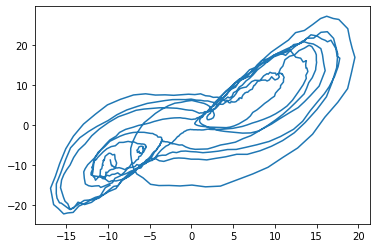

In [82]:
plt.plot(sol[:, 0, 0], sol[:, 0, 1])

In [54]:
?eq._rhs.py_func

Signature: eq._rhs.py_func(x, y, z, t, beta, rho, sigma)
Docstring: <no docstring>
File:      ~/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/flows.py
Type:      function


In [52]:
param_list

[2.667, 28, 10]

In [34]:
torch.tensor([rhs.ic])

tensor([[ -9.7869, -15.0385,  20.5340]], dtype=torch.float64)

In [168]:
1.5 / noise_scale

0.1999044804690442

In [349]:
model = Lorenz()
ref_traj = model.make_trajectory(2, pts_per_period=pts_per_period, resample=False)
noise_traj = model.make_trajectory(2, noise=0.5, pts_per_period=pts_per_period, resample=False)
noise_scale = np.median(np.abs((ref_traj - noise_traj)[-1]))
# noise_scale = 0.025 / noise_scale
noise_scale = 2.219312524586793 *  noise_scale

KeyError: 'values'

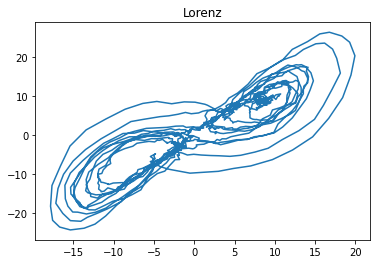

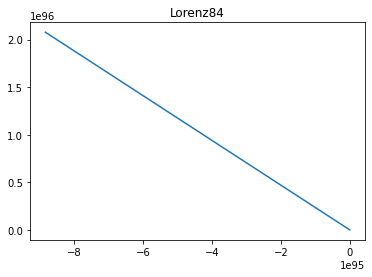

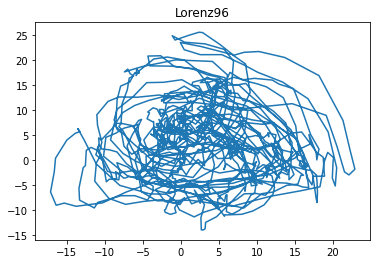

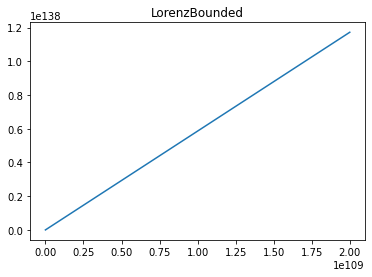

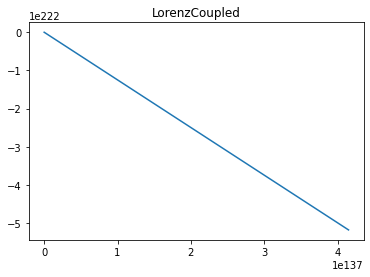

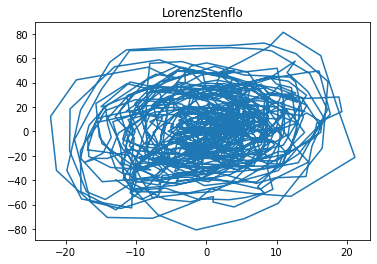

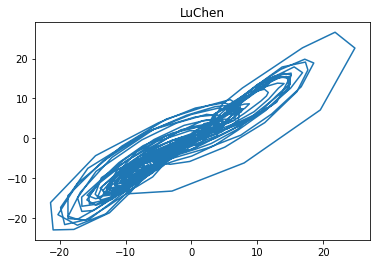

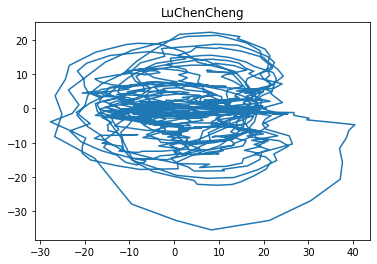

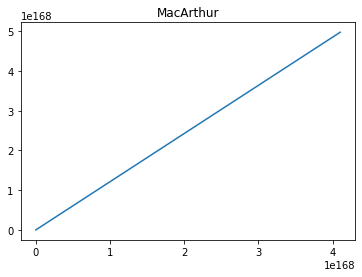

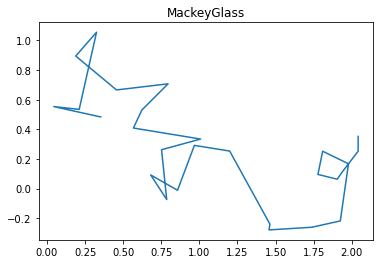

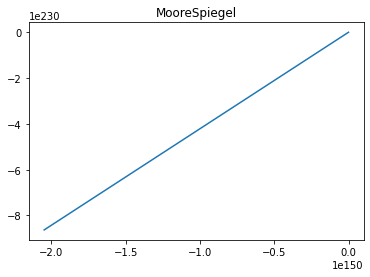

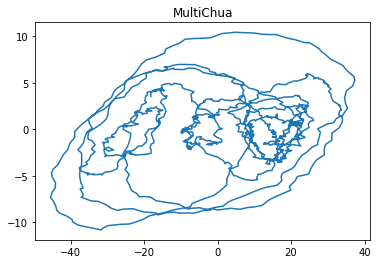

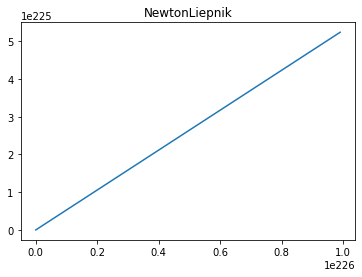

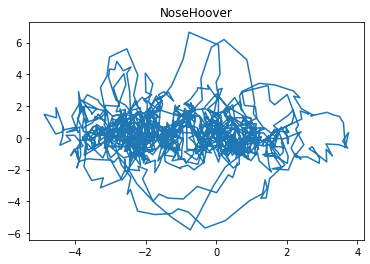

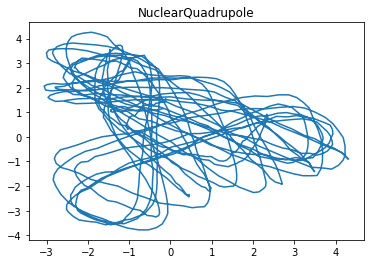

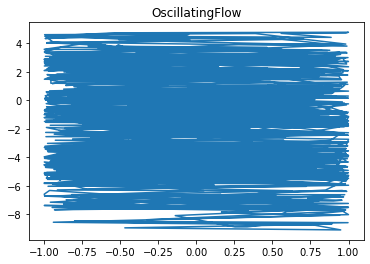

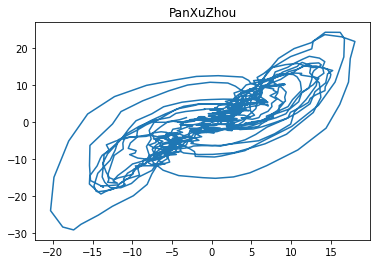

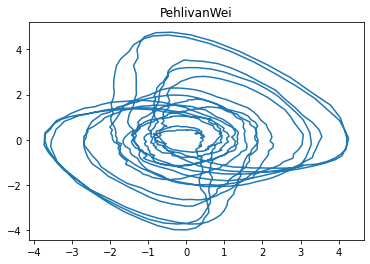

<Figure size 432x288 with 0 Axes>

In [21]:
%matplotlib inline
for equation_name in list(dataset.keys())[-19:]:
    plt.figure()
    #plt.plot(np.array(dataset[equation_name]["values"]))
    plt.plot(np.array(dataset[equation_name]["values"])[:, 0],np.array(dataset[equation_name]["values"])[:, 1])
    plt.title(equation_name)

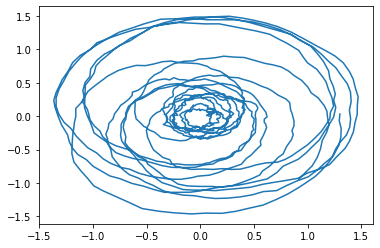

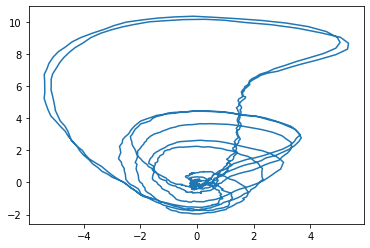

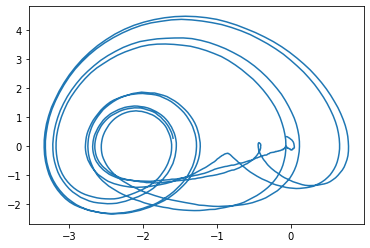

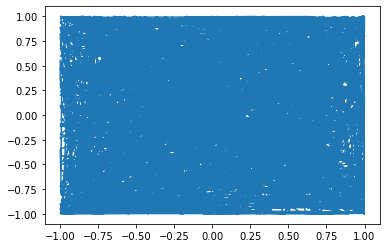

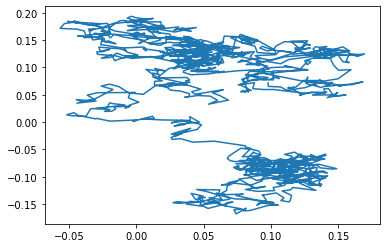

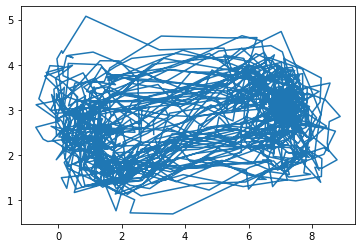

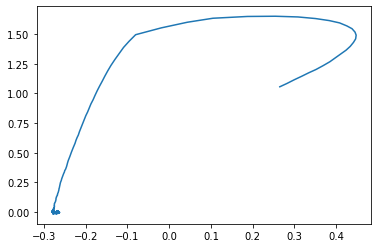

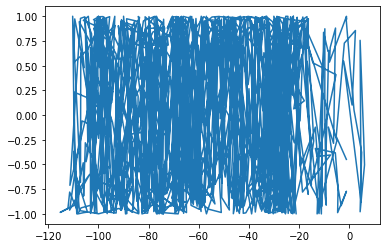

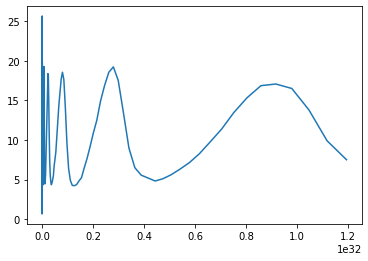

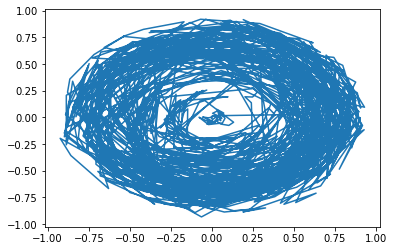

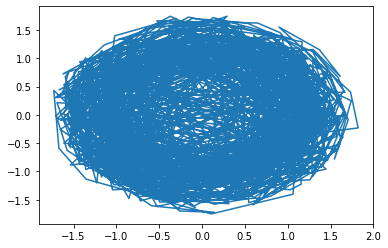

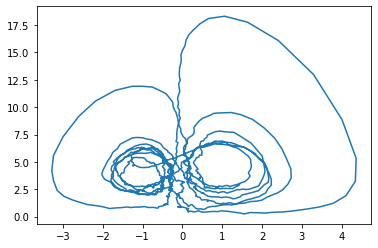

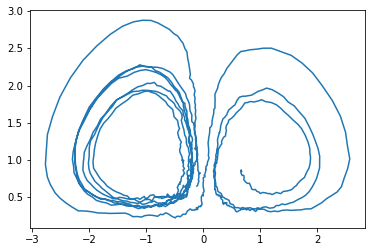

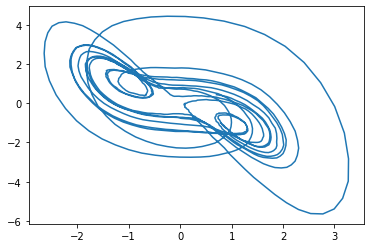

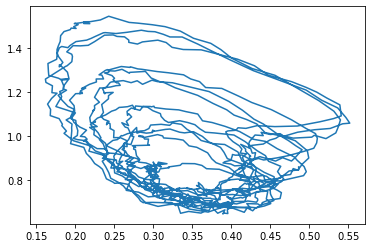

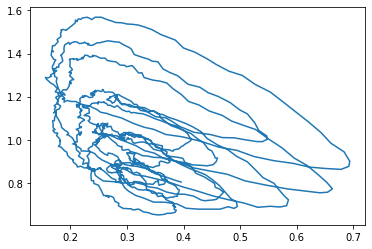

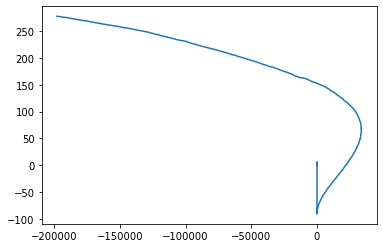

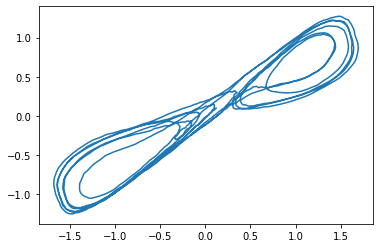

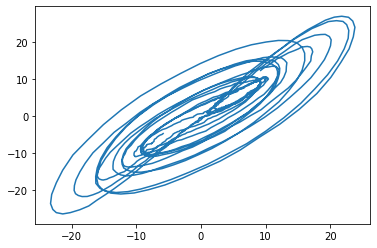

In [347]:
%matplotlib inline
for equation_name in list(dataset.keys())[:19]:
    plt.figure()
    #plt.plot(np.array(dataset[equation_name]["values"]))
    plt.plot(np.array(dataset[equation_name]["values"])[:, 0],np.array(dataset[equation_name]["values"])[:, 1])

In [22]:
%matplotlib inline

plt.plot(np.array(dataset['SprottR']["values"])[:, 0],np.array(dataset['SprottR']["values"])[:, 1])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed